In [1]:
from classes.MedSAMClass_copy2 import MedSAMInferer
import numpy as np

import utils.promptUtils as prUt
import utils.analysisUtils as anUt
from utils.imageUtils import read_im_gt

# Obtain model, image, gt
device = 'cuda'
medsam_checkpoint_path = '/home/t722s/Desktop/UniversalModels/TrainedModels/medsam_vit_b.pth'

medsam_inferer = MedSAMInferer(medsam_checkpoint_path, device)

# img_path = '/home/t722s/Desktop/Datasets/BratsMini/imagesTs/BraTS2021_01646.nii.gz'
# gt_path = '/home/t722s/Desktop/Datasets/BratsMini/labelsTs/BraTS2021_01646.nii.gz'
# img, gt = read_im_gt(img_path, gt_path)

# img_path = '/home/t722s/Desktop/Datasets/amosForUniversegTest/imagesTs/amos_0001.nii.gz'
# gt_path = '/home/t722s/Desktop/Datasets/amosForUniversegTest/labelsTs/amos_0001.nii.gz'
# img, gt = read_im_gt(img_path, gt_path, 2)

img_path = '/home/t722s/Desktop/Datasets/Dataset350_AbdomenAtlasJHU_sub/imagesTr/BDMAP_00000001_0000.nii.gz'
gt_path = '/home/t722s/Desktop/Datasets/Dataset350_AbdomenAtlasJHU_sub/labelsTr/BDMAP_00000001.nii.gz'
img, gt = read_im_gt(img_path, gt_path, 9)

In [5]:
# Experiment: 2d bounding box per slice with foreground
box_prompt = prUt.get_minimal_boxes_row_major(gt, 3, 3)
segmentation = medsam_inferer.predict(img, box_prompt)
anUt.compute_dice(segmentation, gt)

Using previously generated image embeddings


Performing inference on slices: 100%|██████████| 52/52 [00:00<00:00, 162.48it/s]


0.837091419292181

In [3]:
# Experiment: get 3d bbox and slice it to feed it in 2d axially
box_prompt = prUt.get_bbox3d_sliced(gt)

segmentation = medsam_inferer.predict(img, box_prompt)
anUt.compute_dice(segmentation, gt)

Using previously generated image embeddings


Performing inference on slices: 100%|██████████| 52/52 [00:00<00:00, 171.89it/s]


0.4286746891319168

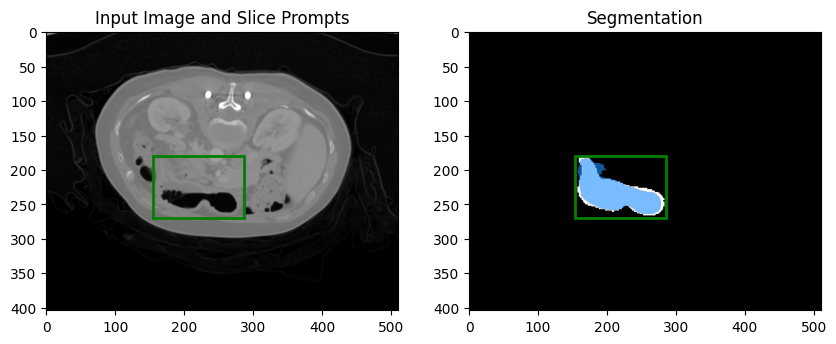

0.9089673913043478

In [6]:
slice_idx = 144
anUt.show_seg_row_major(slice_idx, img, gt, segmentation, box_prompt= box_prompt)

In [7]:
n_boxes = 5

seed_boxes = prUt.get_seed_boxes(gt, n_boxes)
box_prompt = prUt.box_interpolation(seed_boxes)
segmentation = medsam_inferer.predict(img, box_prompt)
anUt.compute_dice(segmentation, gt)

Using previously generated image embeddings


Performing inference on slices: 100%|██████████| 52/52 [00:00<00:00, 188.13it/s]


0.6652868253267932

In [8]:
# Experiment: Box propagation

seed_box = prUt.get_seed_box(gt)
slices_to_infer = np.where(np.any(gt, axis=(1,2)))[0]

segmentation = prUt.box_propagation(medsam_inferer, img, seed_box, slices_to_infer)

print(anUt.compute_dice(gt,segmentation))

Propagating down:  96%|█████████▌| 24/25 [00:01<00:00, 15.04it/s]/home/t722s/Desktop/UniversalModels/Project/UniversalInterface/utils/promptUtils.py:480: UserWarning: 
Terminate early: no fg generated
  warnings.warn('\nTerminate early: no fg generated')
Propagating up:  62%|██████▏   | 16/26 [00:01<00:00, 13.53it/s]/home/t722s/Desktop/UniversalModels/Project/UniversalInterface/utils/promptUtils.py:501: UserWarning: 
Terminate early: no fg generated
  warnings.warn('\nTerminate early: no fg generated')
Propagating up:  65%|██████▌   | 17/26 [00:01<00:00, 13.94it/s]


0.1196965769235517


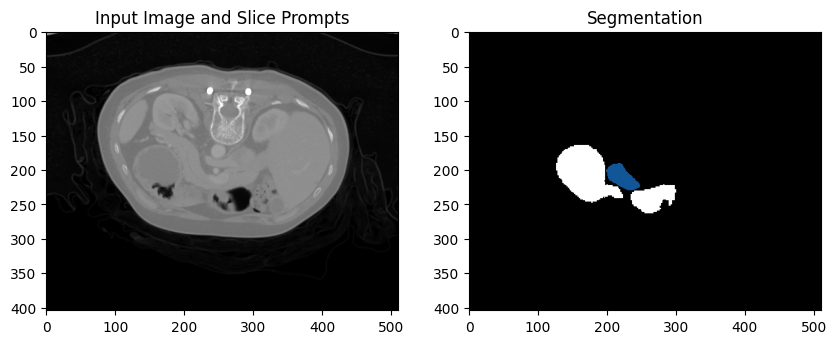

0.0

In [12]:
# Slice visualisation:
slice_idx = 150
anUt.show_seg_row_major(slice_idx, img, gt, segmentation) #, pts_prompt= pts_prompt, box_prompt = box_prompt)